In [17]:
# default first cell - Zack Li
%matplotlib inline
# fix DPI issues on mac
%config InlineBackend.figure_format = 'retina'
 # autoreload workflow, reload modules every time cell is run
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
default_color_list = plt.rcParams['axes.prop_cycle'].by_key()['color'] # get default colors
import matplotlib
matplotlib.rcParams['figure.figsize'] = 8,8 # have to fix figure size due to backend

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We load in some data.

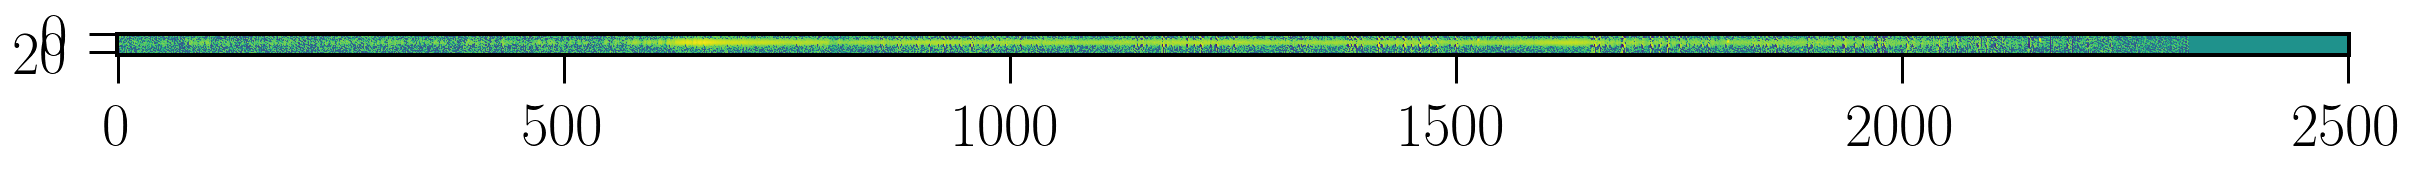

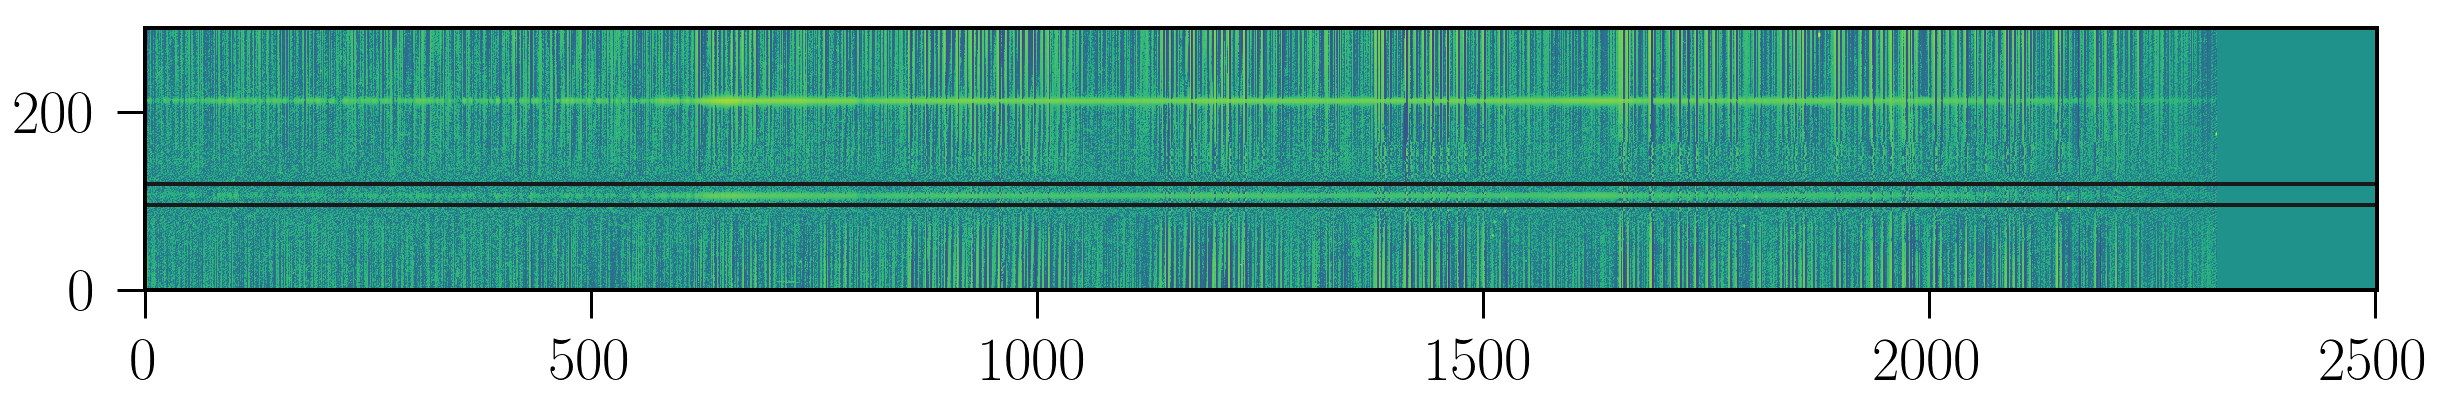

In [39]:
filename = 'all_nine_2spec.fits'
QSOB_from_COSMOS = fits.getdata('all_nine_2spec.fits', ext=0)
slit_max = QSOB_from_COSMOS.shape[1]


cropped_B = QSOB_from_COSMOS[0,95:slit_max-175,:]
cropped_B_err = QSOB_from_COSMOS[1,95:slit_max-175,:]

plt.figure(figsize=(20,4))
plt.imshow( np.arcsinh(cropped_B) )


plt.figure(figsize=(20,4))
plt.imshow( np.arcsinh(QSOB_from_COSMOS[0,:,:]), origin='lower' )
plt.gca().axhline(95)
plt.gca().axhline(slit_max-175)


In [19]:
QSO_hdu = fits.open(filename)

wavelengths = QSO_hdu[0].header['CRVAL1'] + \
    QSO_hdu[0].header['CDELT1']*np.arange(QSOB_from_COSMOS.shape[-1])

In [20]:
import numpy

def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

#     if x.ndim != 1:
#         raise ValueError, "smooth only accepts 1 dimension arrays."

#     if x.size < window_len:
#         raise ValueError, "Input vector needs to be bigger than window size."


    if window_len<3:
        return x


#     if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
#         raise ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'"


    s=numpy.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=numpy.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=numpy.convolve(w/w.sum(),s,mode='valid')
    return y


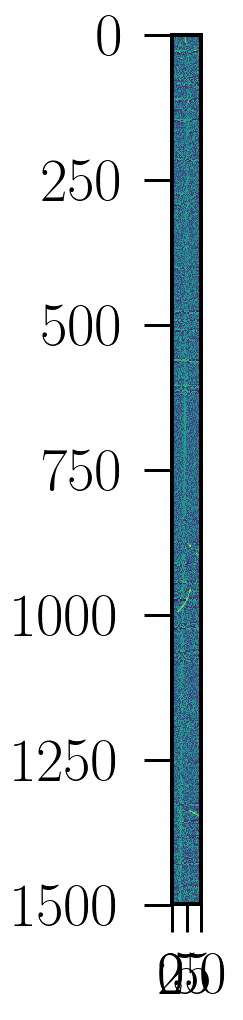

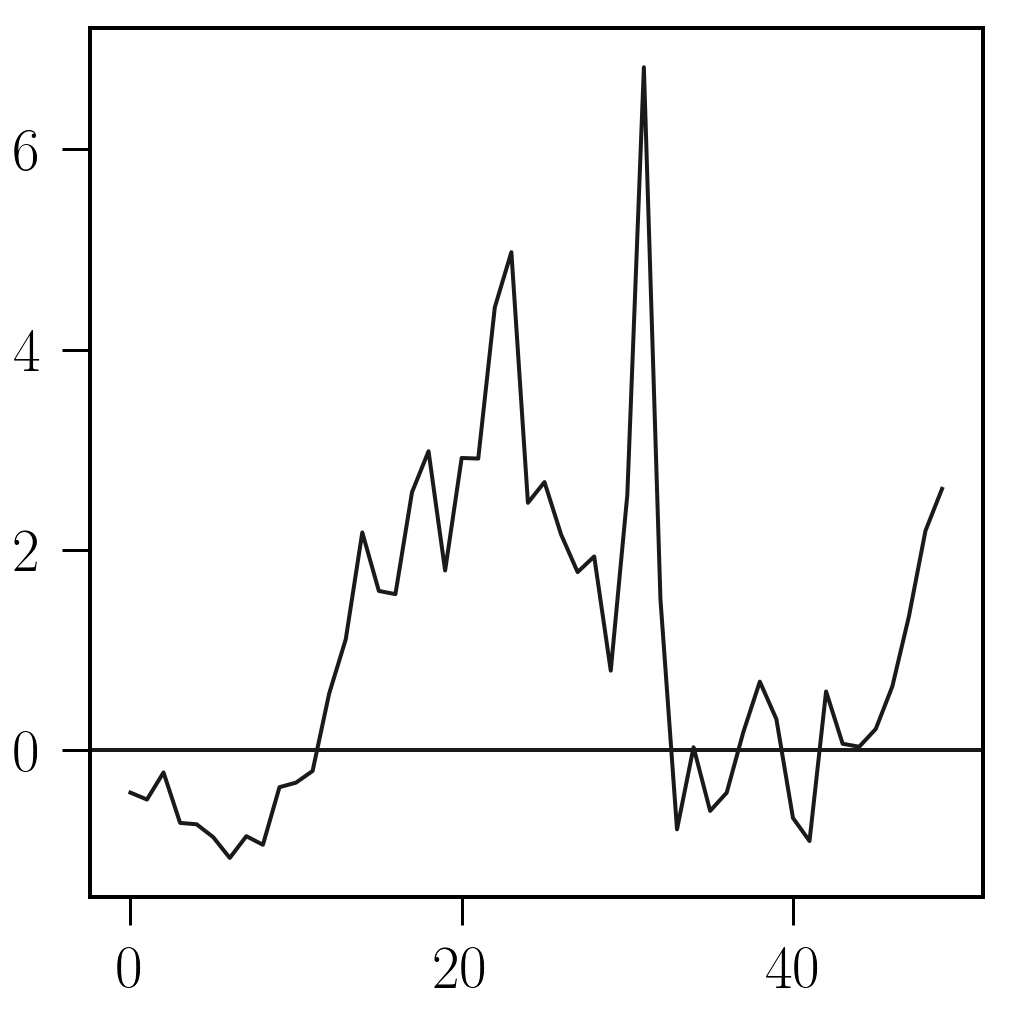

In [21]:
# plt.plot( np.mean(i1_cropped, axis=1), label='0' )
s = fits.getdata('/Users/zequnl/ccd0079_s.fits', ext=0)
cropped = s[0,500:2000,650:700]
plt.imshow( np.arcsinh(cropped) )
# no2d = no2d[0,95:slit_max-175,start:end]
plt.figure()
plt.plot( np.mean(cropped, axis=0), label='10' )
plt.gca().axhline(0.0)

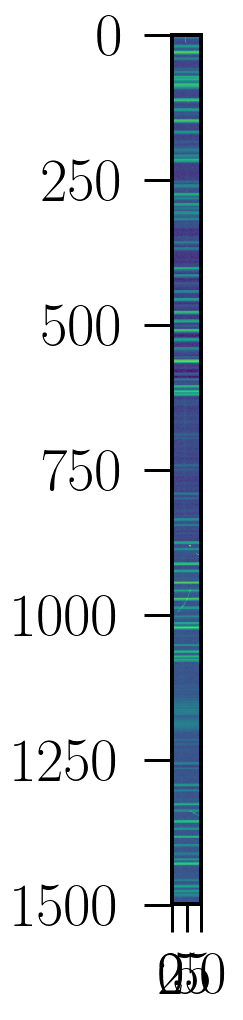

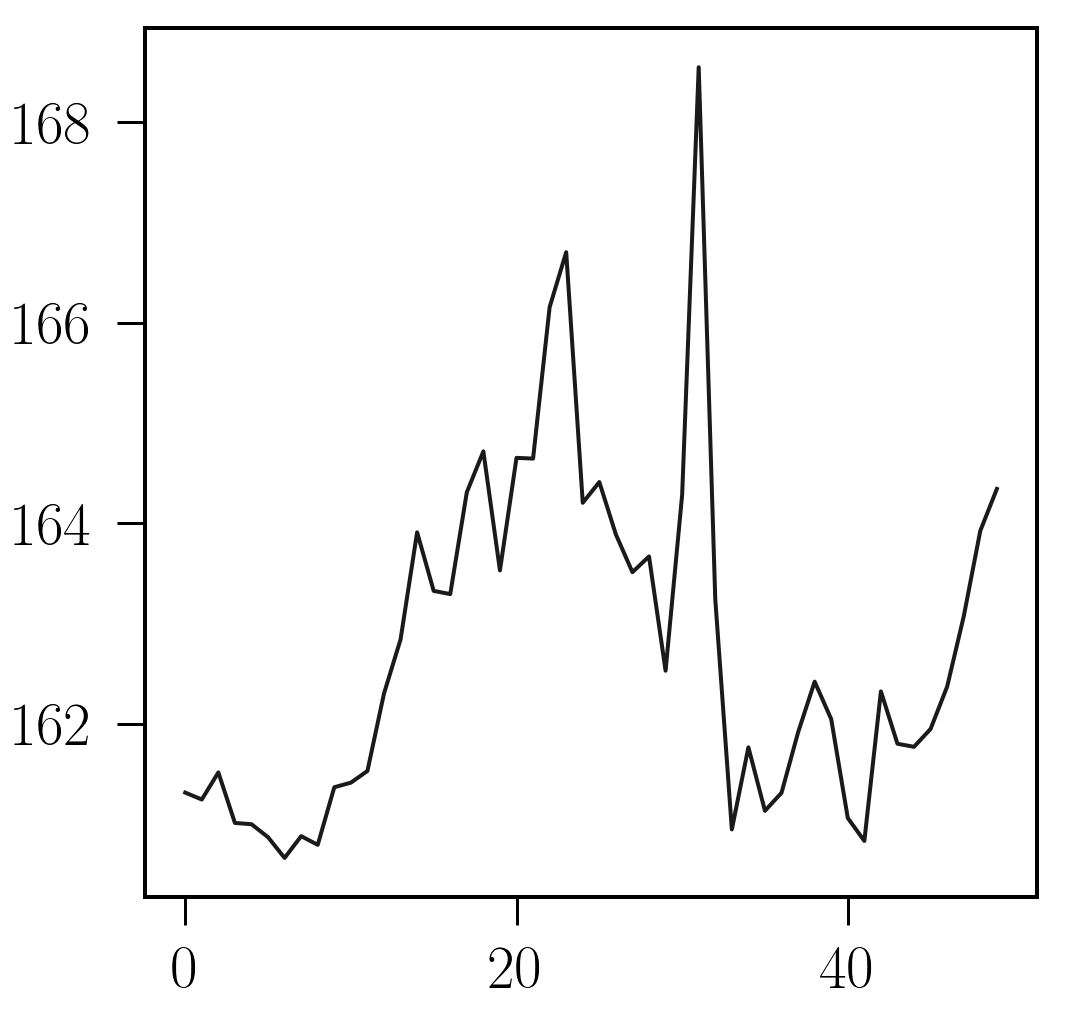

In [22]:

s = fits.getdata('/Users/zequnl/ccd0079_f.fits', ext=0)
cropped = s[500:2000,650:700]
plt.imshow( np.arcsinh(cropped) )
# no2d = no2d[0,95:slit_max-175,start:end]
plt.figure()
plt.plot( np.mean(cropped, axis=0), label='10' )
# plt.gca().axhline(0.0)

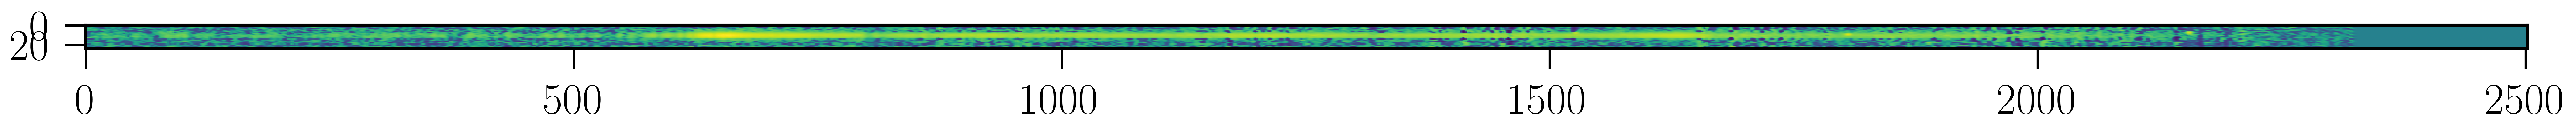

In [26]:
D = cropped_B
num_y, num_x = D.shape

profile_x = np.linspace(0,1,num_y)
hsmoothed_D = np.array([scipy.ndimage.filters.gaussian_filter1d(row, 2.0) 
                            for row in cropped_B])

plt.figure(figsize=(30,4),dpi=200)
plt.imshow( np.arcsinh(hsmoothed_D) )

/Users/zequnl/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/Users/zequnl/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/Users/zequnl/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/Users/zequnl/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/Users/zequnl/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/Users/zequnl/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/Users/zequnl/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/Users/zequnl/anaconda3/

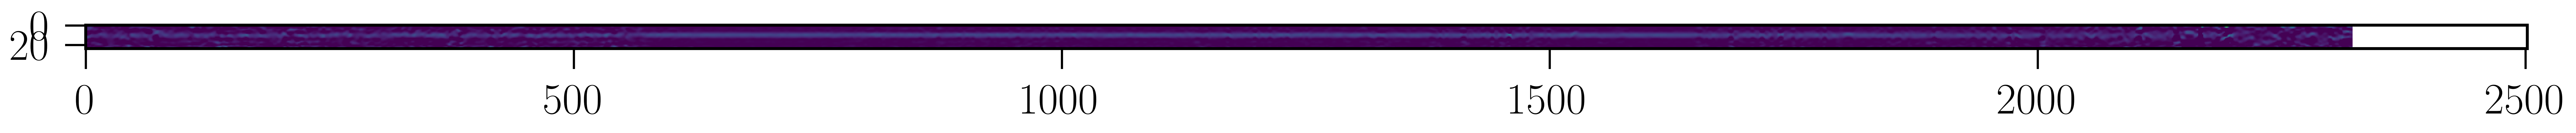

In [28]:
V = cropped_B_err

P = np.array( [ (np.poly1d(np.polyfit(profile_x, D_xl, 12, 
                                          w=1./np.sqrt(V_xl))))(profile_x) 
                   for D_xl, V_xl in zip(hsmoothed_D.T,V.T) ]).T
P = np.maximum(0,P)
P = [Pcol / np.sum(P,axis=0) for Pcol in P]# normalize P

plt.figure(figsize=(30,4),dpi=200)
plt.imshow(P)



/Users/zequnl/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()
/Users/zequnl/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/Users/zequnl/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/Users/zequnl/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/Users/zequnl/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/Users/zequnl/anaconda3/envs/py2/lib/

(0, 2000)

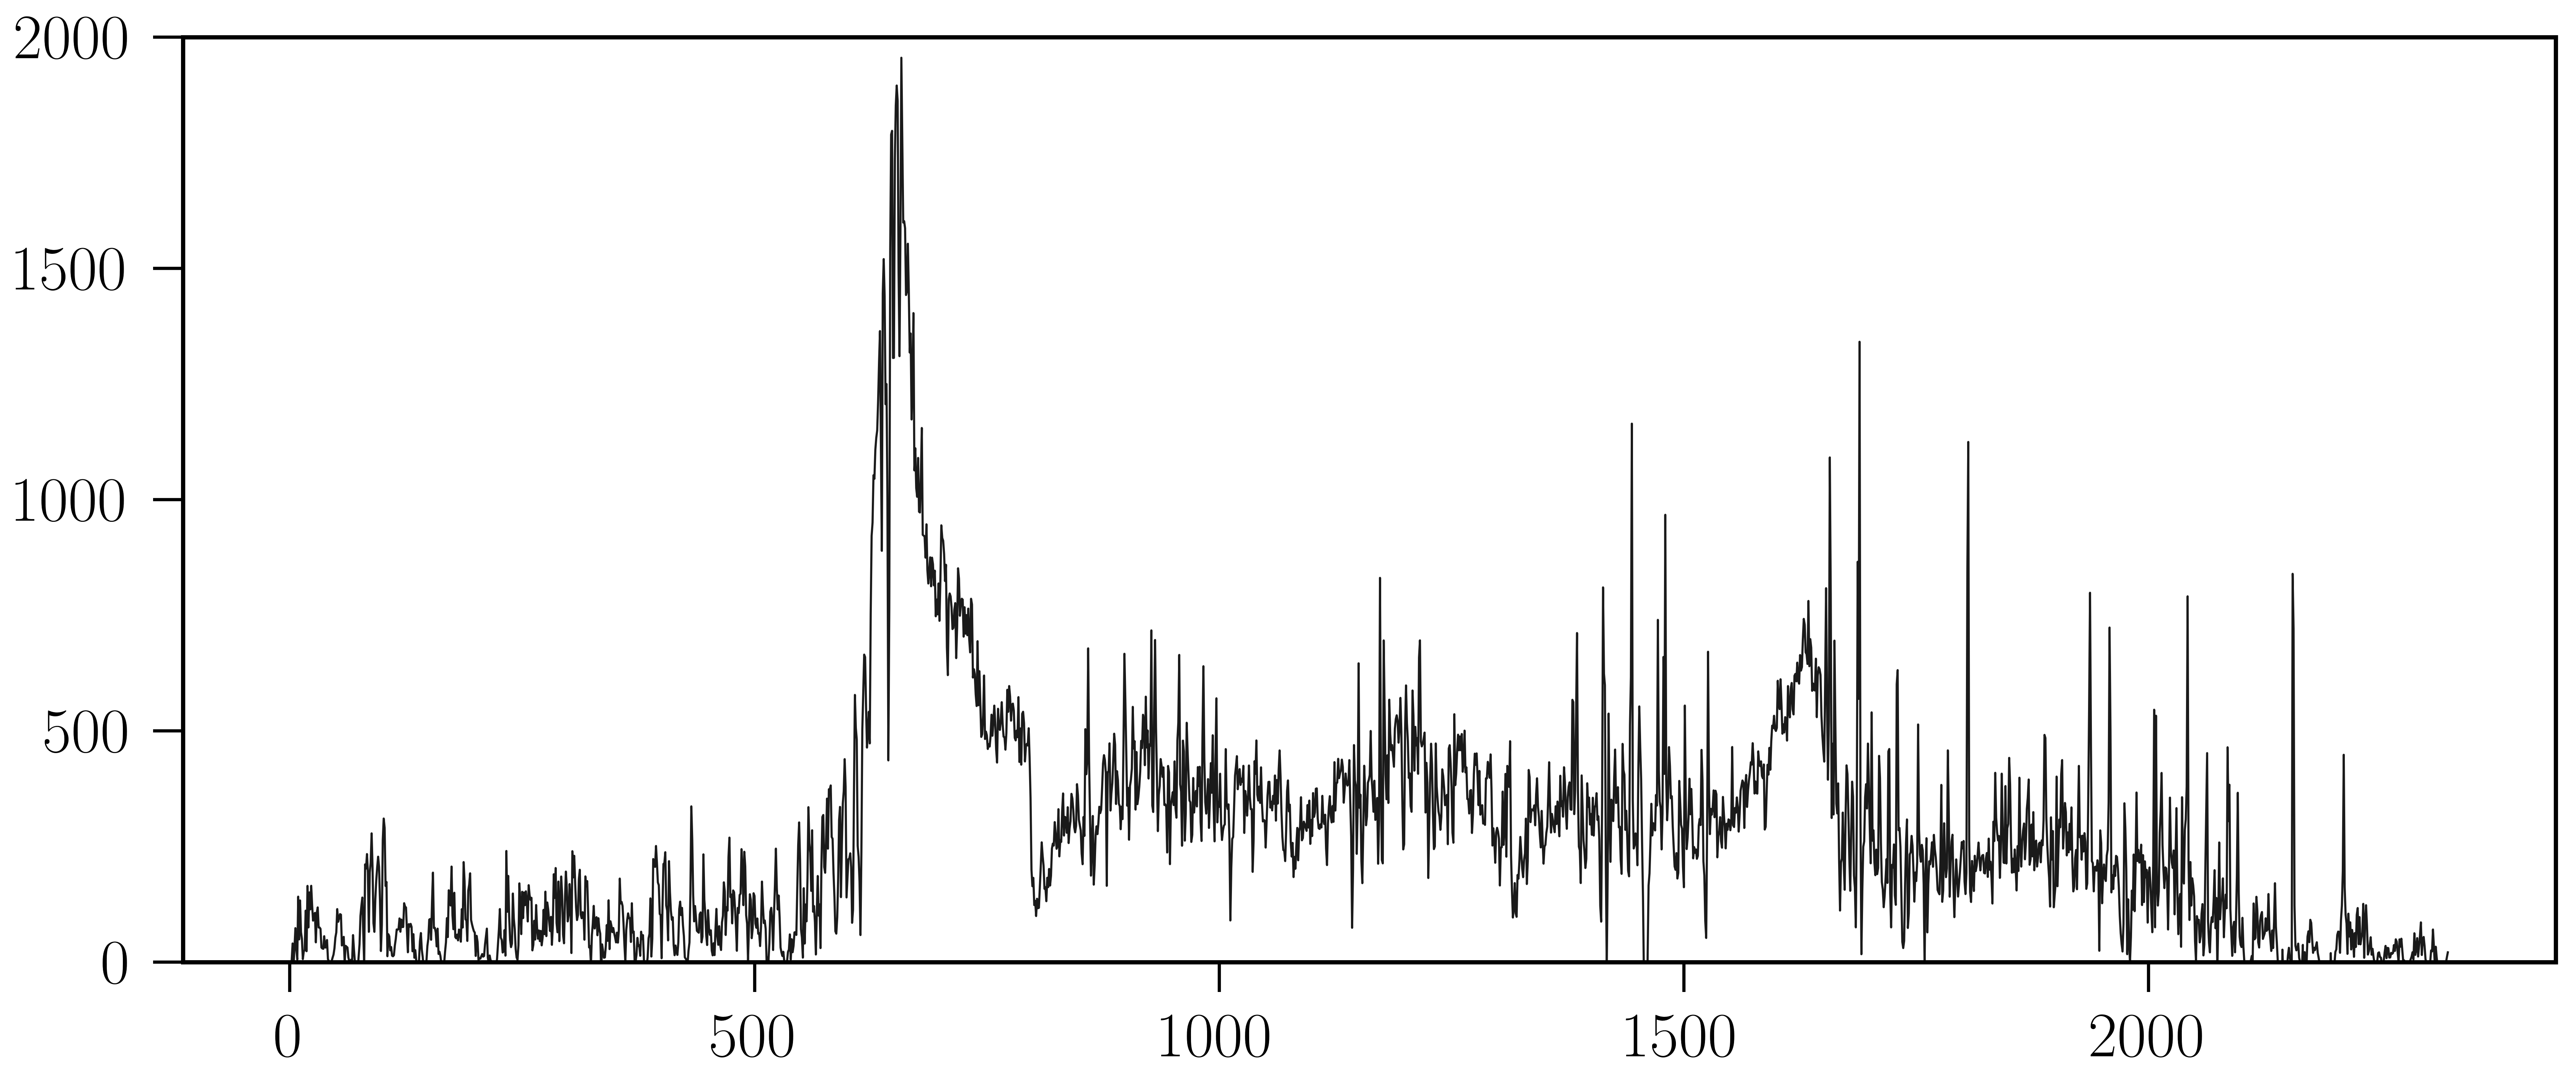

In [35]:
def iterate_Horne1968(D, V, order=13):
    num_y, num_x = D.shape
    
    ## fit the polynomial profile image array
    profile_x = np.linspace(0,1,num_y)
    hsmoothed_D = np.array([scipy.ndimage.filters.gaussian_filter1d(row, 2.0) 
                            for row in cropped_B])
#     hsmoothed_D = np.maximum(0,hsmoothed_D)
    P = np.array( [ (np.poly1d(np.polyfit(profile_x, D_xl, order, 
                                          w=1./np.sqrt(V_xl))))(profile_x) 
                   for D_xl, V_xl in zip(hsmoothed_D.T,V.T) ]).T
#     P = np.maximum(0,P)
    P = np.array([Pcol / np.sum(P,axis=0) for Pcol in P])# normalize P
    ## equation 8 and 9
    result_var = np.array( [1. / np.sum(P_xl**2 / V_xl)
                            for P_xl, V_xl in zip(P.T, V.T)] )
    result_f = [np.sum( P_xl * D_xl / V_xl ) * var_l
              for P_xl, D_xl, V_xl, var_l in zip(P.T, D.T, V.T, result_var.T) ]
    
    return result_f, result_var, P
    

sig2, var2, p2 = iterate_Horne1968(cropped_B, cropped_B_err)
plt.figure(dpi=200, figsize=(20,8))
# plt.plot( (sig2-np.sum(cropped_B,axis=0))/np.sum(cropped_B,axis=0), 'k.')
# plt.plot(, 'r.')
plt.plot(sig2,'-', lw=1)
plt.ylim(0,2000)


In [ ]:
for ind in range(len(D)):
    plt.plot(p2[:,ind] )
    
plt.gca().axhline(0)
# plt.plot(hsmoothed_D[:,ind]/700)

In [40]:
% ls *_f.fits

ccd0063_f.fits  ccd0065_f.fits  ccd0071_f.fits  ccd0077_f.fits  ccd0079_f.fits
ccd0064_f.fits  ccd0070_f.fits  ccd0072_f.fits  ccd0078_f.fits


In [42]:
list_of_flats = []

for flat_file in ['ccd0063_f.fits',  'ccd0065_f.fits',  'ccd0071_f.fits',  'ccd0077_f.fits',  'ccd0079_f.fits',
'ccd0064_f.fits',  'ccd0070_f.fits',  'ccd0072_f.fits',  'ccd0078_f.fits']:
    flat = fits.getdata(flat_file, ext=0)
    slit_max = QSOB_from_COSMOS.shape[1]
    list_of_flats.append(flat)

INFO: Auto-setting vmin to  6.624e+00 [aplpy.core]
INFO: Auto-setting vmax to  9.559e+02 [aplpy.core]


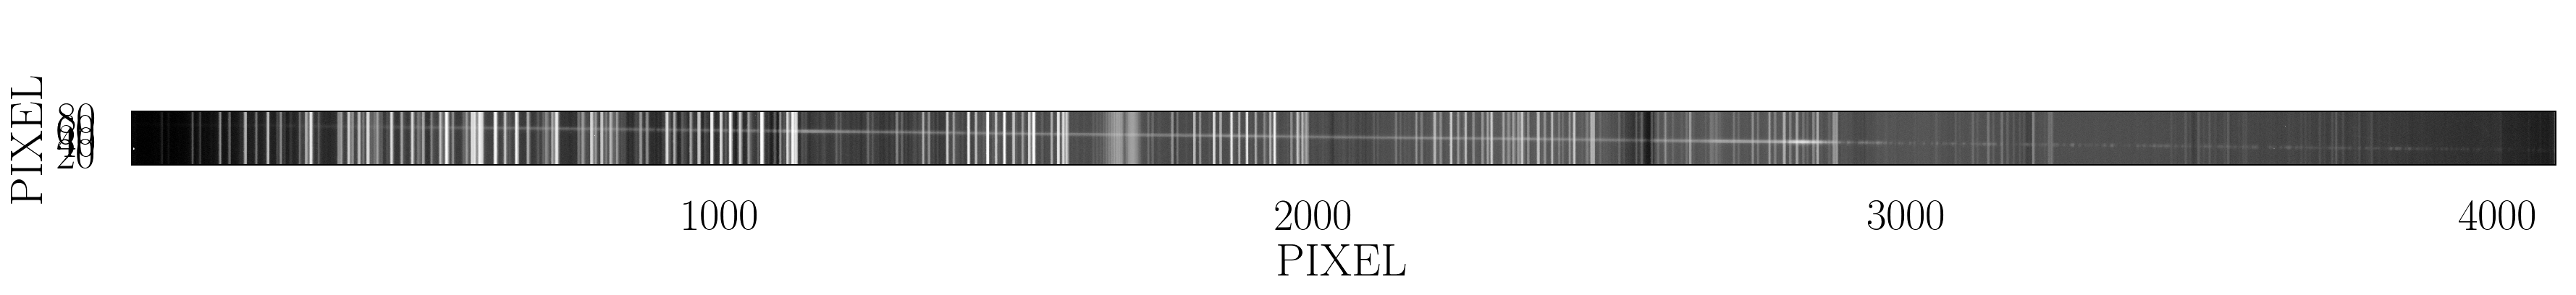

In [173]:
import aplpy

summed = np.median(np.array(list_of_flats),axis=0)

quasar_A = summed[:, 730:820]
quasar_B = summed[:, 600:730]

gc = aplpy.FITSFigure(quasar_A.T, figsize=(30,3))
gc.show_grayscale(stretch='arcsinh')

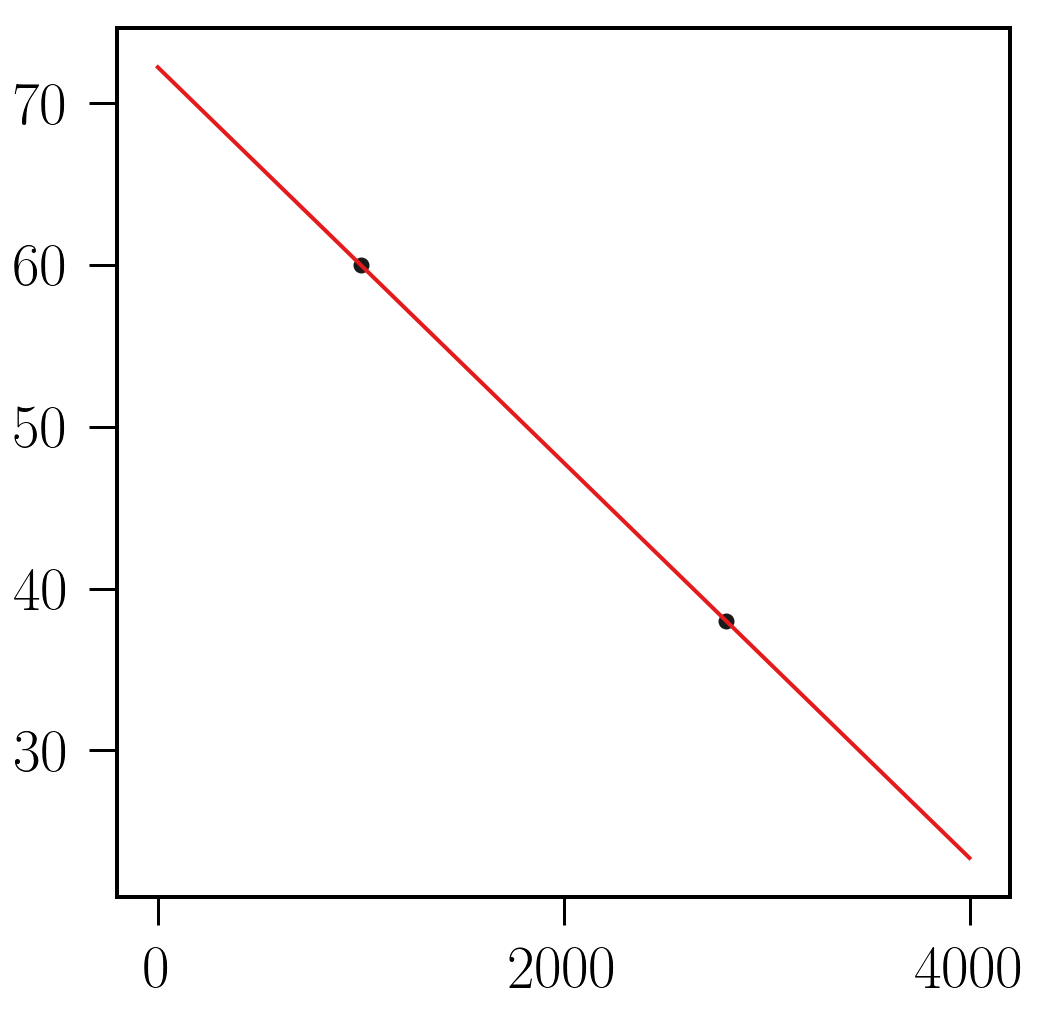

In [174]:
plt.plot( [1000,2800], [60,38],'o' )
xx = np.arange(0,4000)
plt.plot( xx, (-22./1800)*(xx-1000) + 60 )

[ 25.3665062   62.78549347   1.94778132  35.44600911]


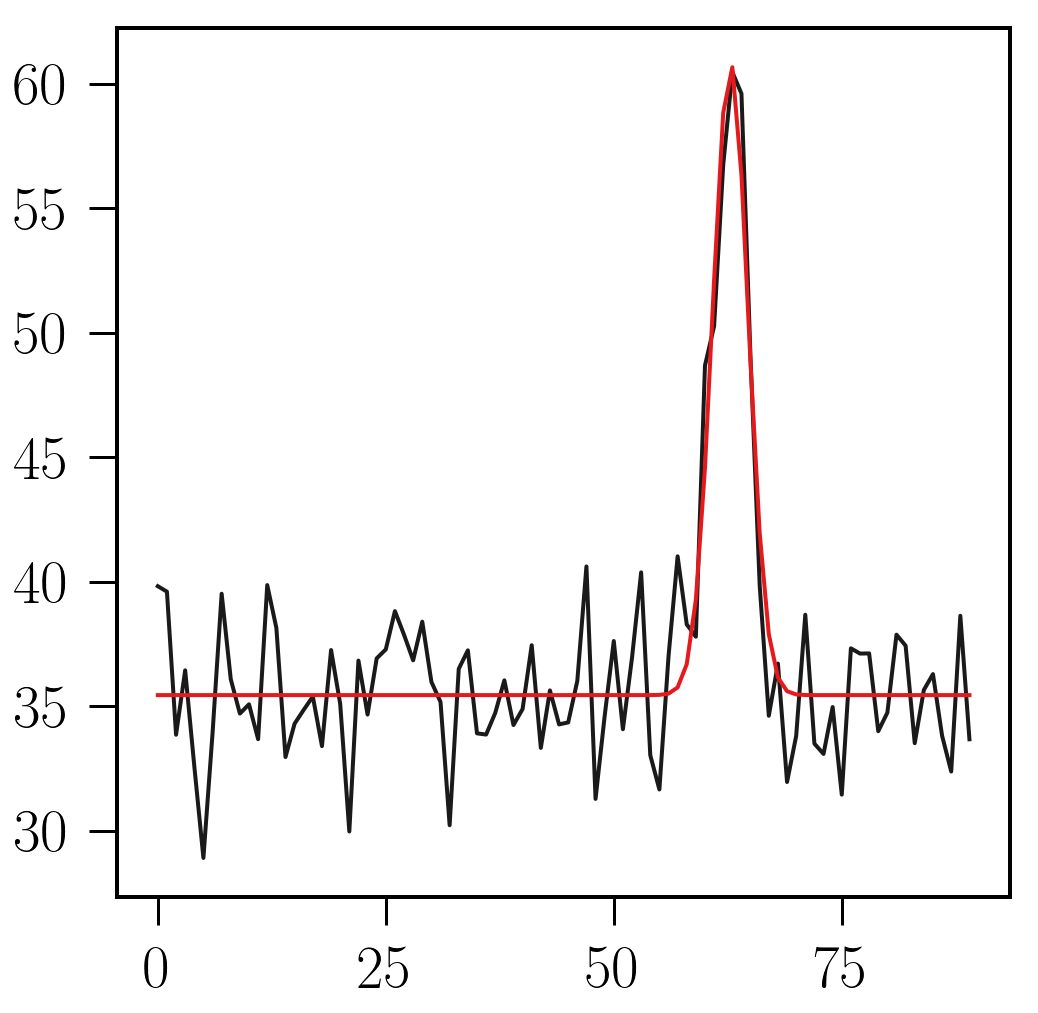

In [175]:
from scipy.optimize import curve_fit

# Define model function to be used to fit to the data above:
def gauss(x, *p):
    A, mu, sigma, C = p
    C = max(C,0)
    A = max(A,0)
    return A*np.exp(-(x-mu)**2/(2.*sigma**2)) + C

row_num = 500
row = quasar_A[row_num,:]
pixel = np.arange(0,len(row))
plt.plot( pixel, row )
center = (-22./1800)*(row_num-1000) + 60
p0 = [2*np.std(row), center, 5., np.median(row)]
coeff, var_matrix = curve_fit(gauss, pixel, row, p0=p0)

plt.plot( pixel, gauss(pixel, *coeff) )
print(coeff)

In [176]:
sky_model = np.zeros( quasar_A.shape )
pixel = np.arange(0,len(row))
# loop through each row

model_x = []
model_y = []
model_width = []

for row_index in range(quasar_A.shape[0]):
    
    row = quasar_A[row_index,:]
    try:
        center = (-22./1800)*(row_index-1000) + 60
        p0 = [2*np.std(row), center, 5., np.median(row)]
        coeff, var_matrix = curve_fit(gauss, pixel, row, p0=p0)
        sky_model[row_index,:] = coeff[-1]
        
        if coeff[0] > 20:
            model_y.append( coeff[1] )
            model_x.append( row_index )
            model_width.append(coeff[2])
    except:
        # just use the mean value, probably a huge sky line or something
        sky_model[row_index,:] = np.mean(row)
        
model_x = np.array(model_x)
model_y = np.array(model_y)
model_width = np.array(model_width)

(0, 100)

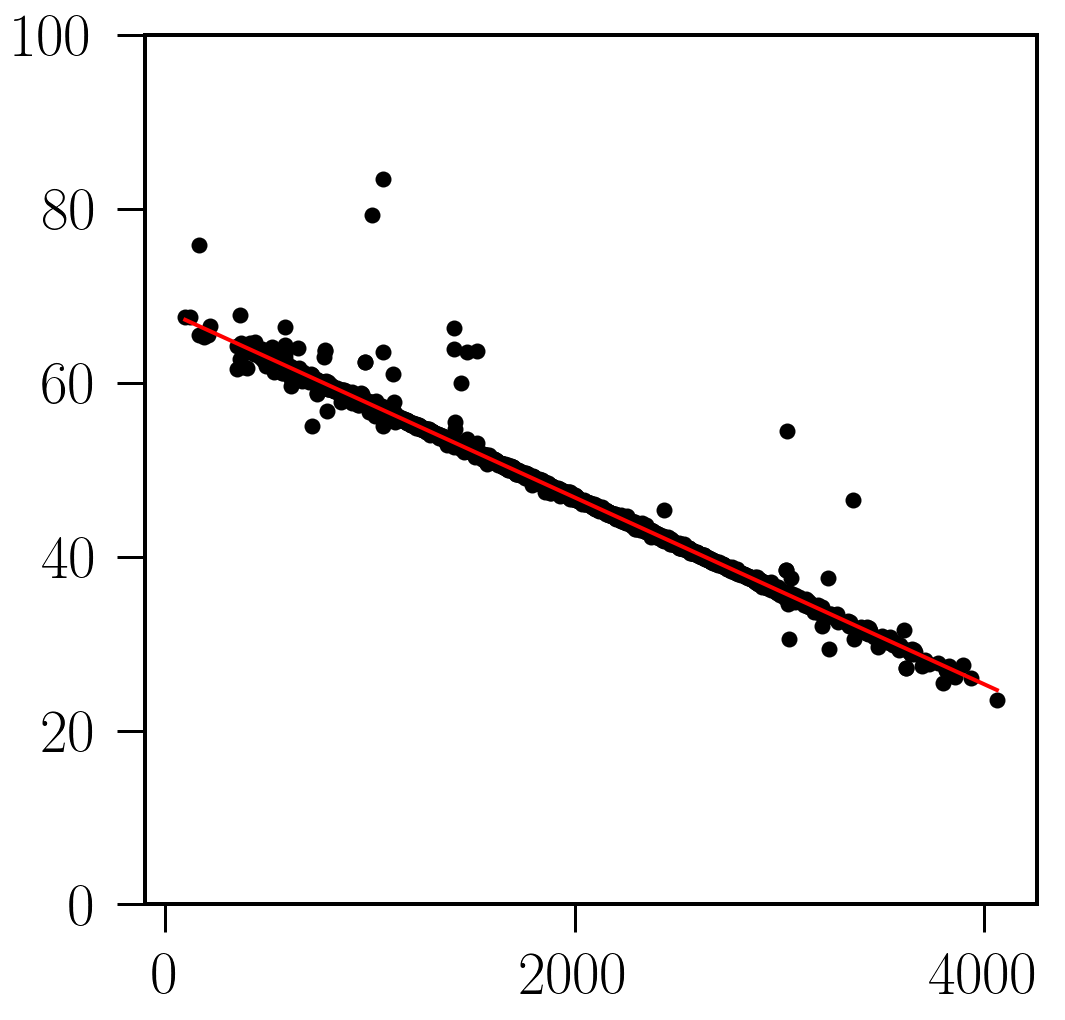

In [206]:
plt.plot( model_x, model_y, 'ko' )
x = model_x
y = model_y
model = np.poly1d(np.polyfit(x[x>400], y[x>400], 1))
plt.plot(np.unique(model_x), model(np.unique(model_x)), 'r-')
plt.ylim(0,100)

Text(0.5,1,u'Profile Widths')

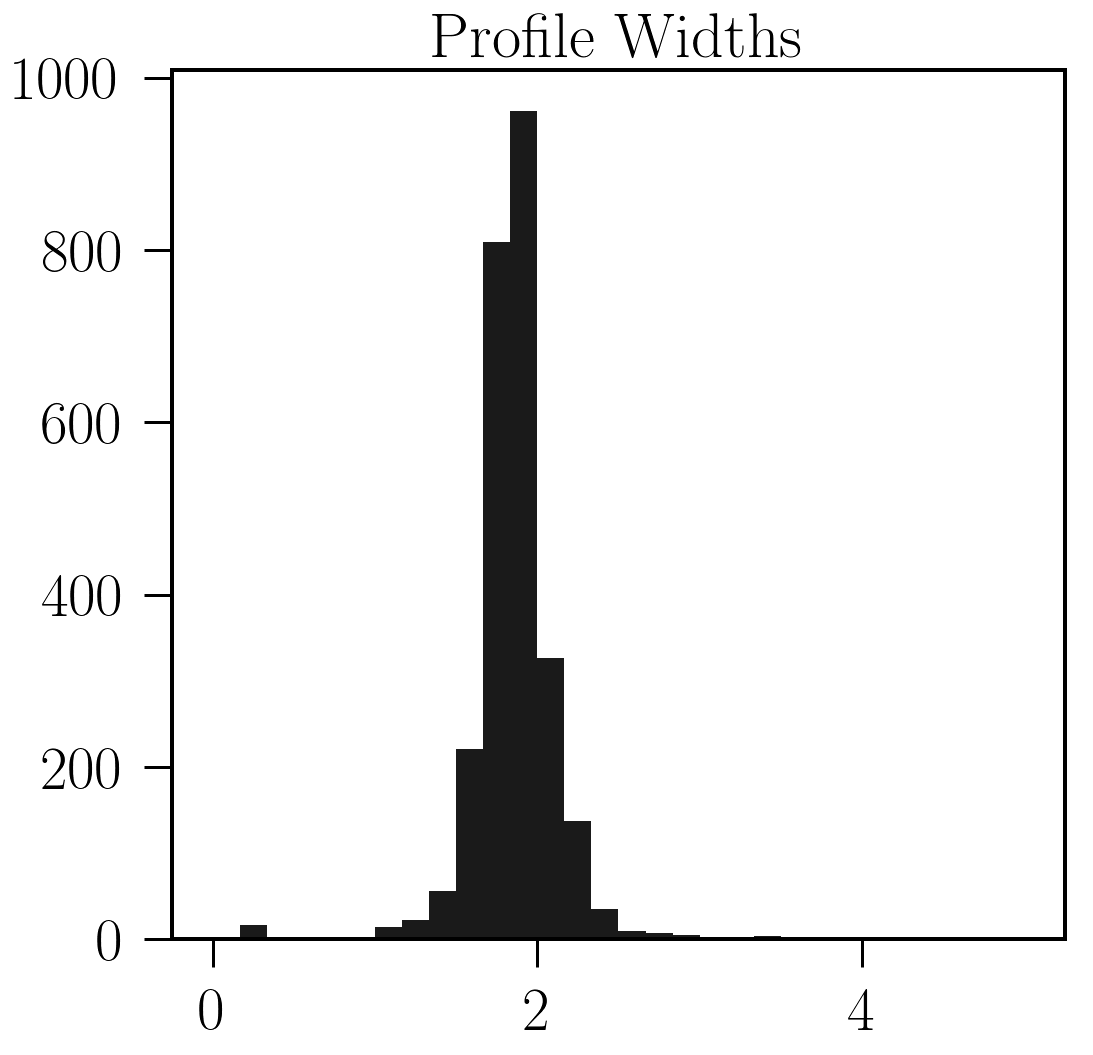

In [193]:
fig, ax = plt.subplots()
ax.hist(model_width, bins=30, range=(0,5))
plt.title('Profile Widths', fontsize=32)

In [221]:

def fixed_gauss(x, *p):
    global row_index
    A, mu, sigma, C = p
    mu = model(row_index)
    C = max(C,0)
    A = max(A,0)
    return A*np.exp(-(x-mu)**2/(2.*sigma**2)) + C

sky_model = np.zeros( quasar_A.shape )
pixel = np.arange(0,len(row))
# loop through each row

model_x = []
model_y = []
model_width = []
model_list = []

for row_index in range(quasar_A.shape[0]):
    
    row = quasar_A[row_index,:]
    medval = np.median(row)
    try:
        center = (-22./1800)*(row_index-1000) + 60
        p0 = [2*np.std(row), center, 5., np.median(row)]
        coeff, var_matrix = curve_fit(fixed_gauss, pixel, row, p0=p0)
        sky_model[row_index,:] = coeff[-1]
        model_list.append( fixed_gauss(pixel, *coeff) )
        
    except Exception as e:
        # just use the mean value, probably a huge sky line or something
        print(e)
        sky_model[row_index,:] = medval
        model_list.append(np.ones(len(pixel))*medval)
    


        
model_x = np.array(model_x)
model_y = np.array(model_y)
model_width = np.array(model_width)
profile_model = np.vstack(model_list)

Optimal parameters not found: Number of calls to function has reached maxfev = 1000.


INFO: Auto-setting vmin to  7.305e+00 [aplpy.core]
INFO: Auto-setting vmax to  9.408e+02 [aplpy.core]


INFO: Auto-setting vmin to  7.522e+00 [aplpy.core]
INFO: Auto-setting vmax to  9.509e+02 [aplpy.core]


INFO: Auto-setting vmin to -2.628e+01 [aplpy.core]
INFO: Auto-setting vmax to  1.183e+02 [aplpy.core]


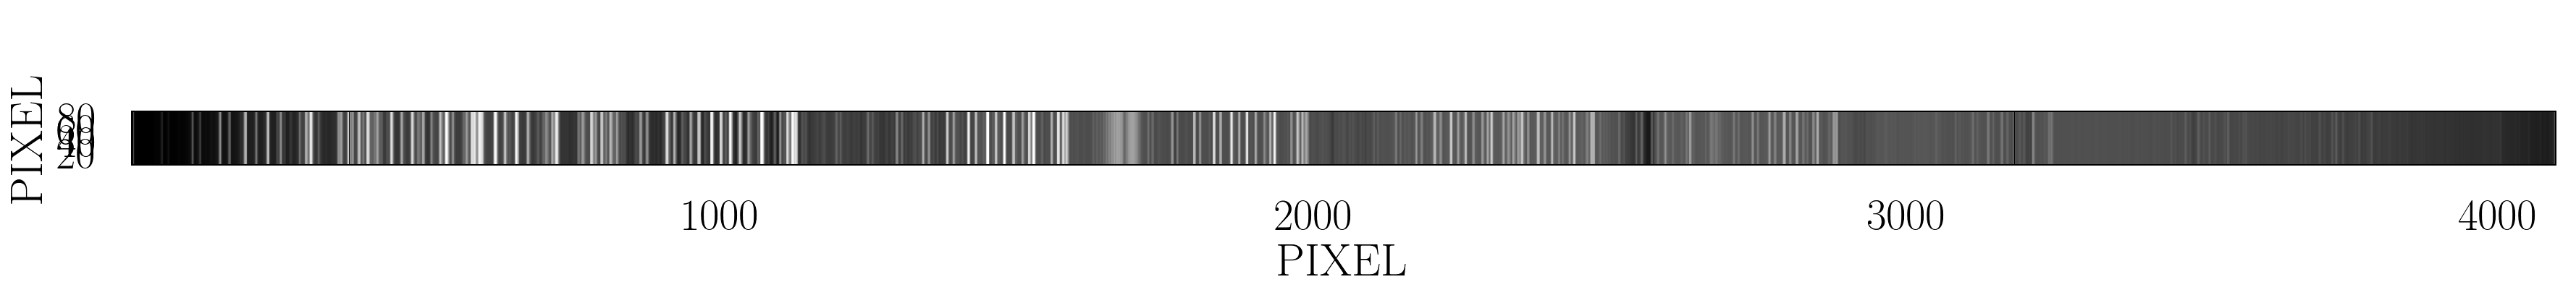

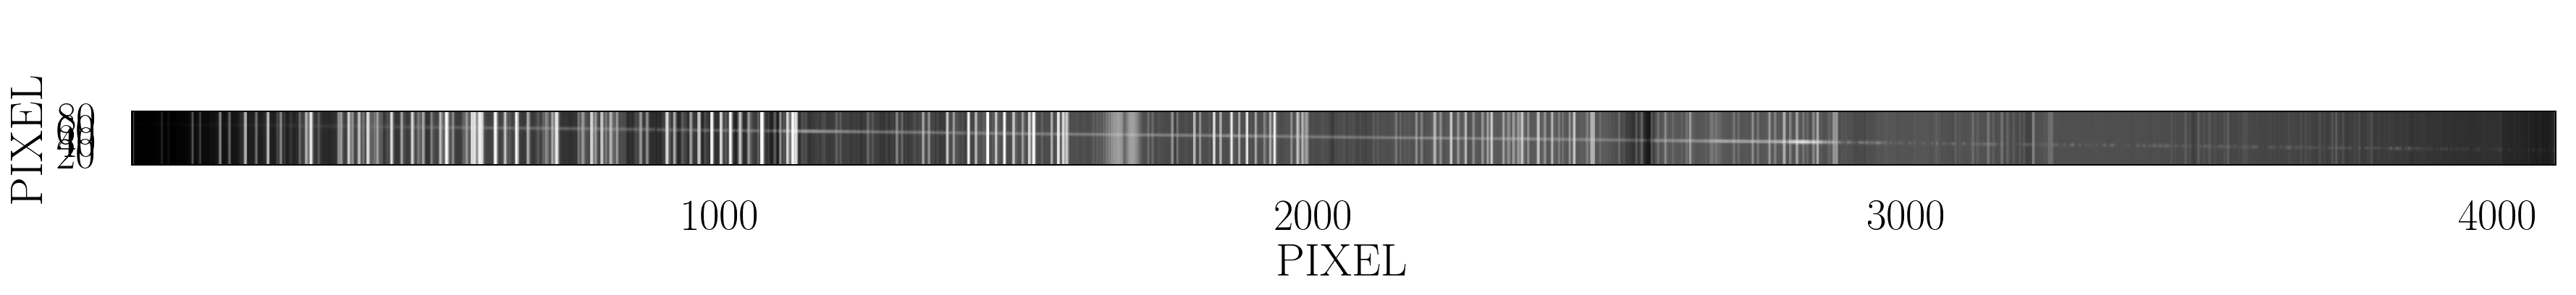

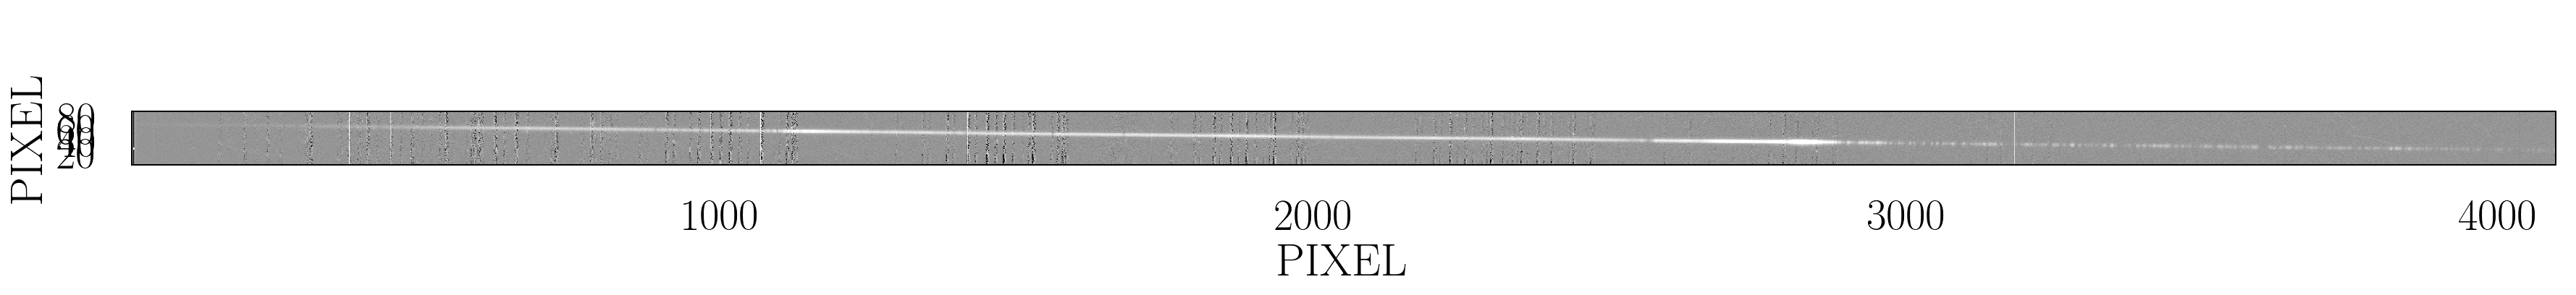

In [222]:
gc = aplpy.FITSFigure(sky_model.T, figsize=(30,3))
gc.show_grayscale(stretch='arcsinh')
gc = aplpy.FITSFigure((profile_model).T, figsize=(30,3))
gc.show_grayscale(stretch='arcsinh')
gc = aplpy.FITSFigure((quasar_A-sky_model).T, figsize=(30,3))
gc.show_grayscale(stretch='arcsinh')

(0, 3000)

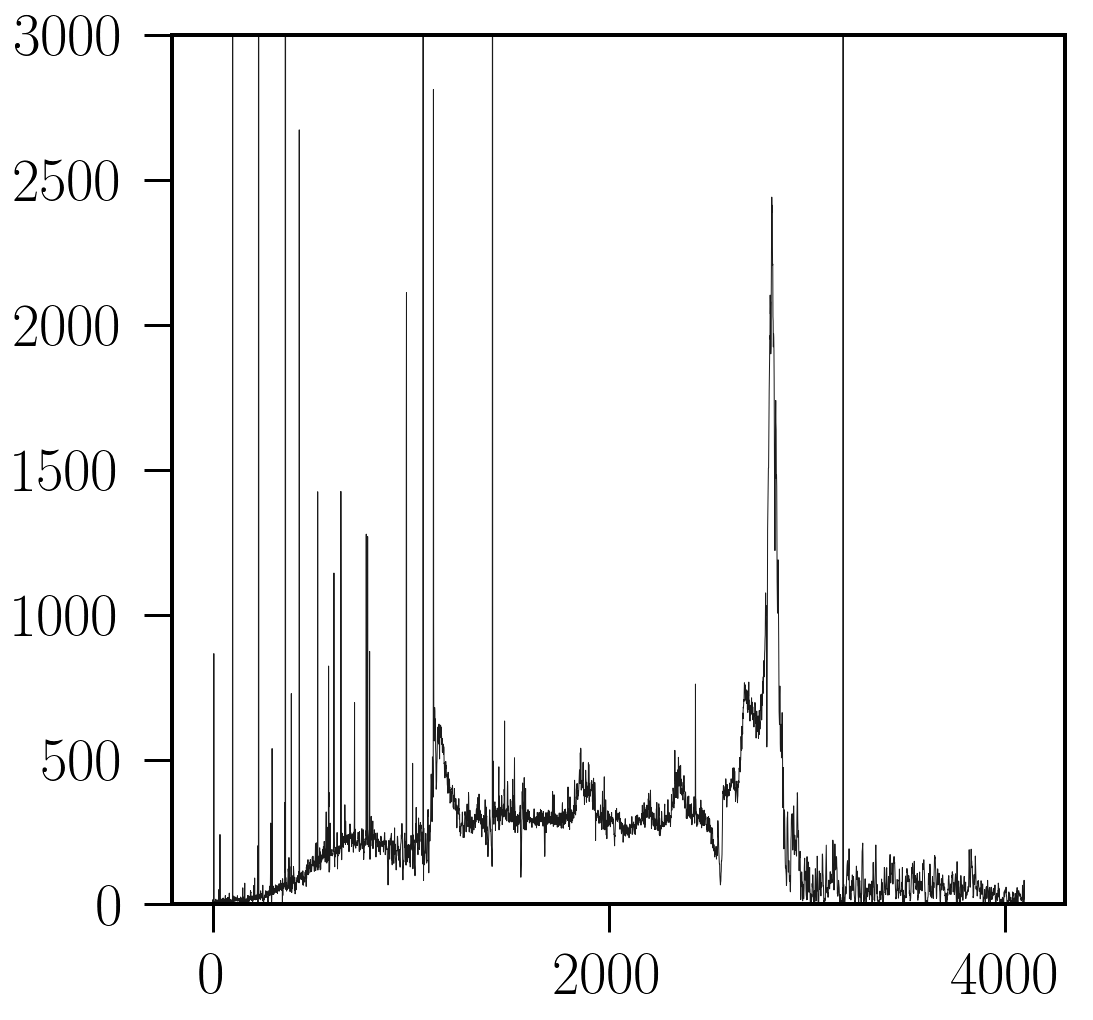

In [229]:
num_offsets = 100
offsets = np.linspace(10., 25., num_offsets)
summed = np.zeros(num_offsets)

for index, offset in enumerate(offsets):
    for row_index in range(quasar_A.shape[0]):
        row = quasar_B[row_index,:]
        pixel = np.array(range(len(row)))
        center = model(row_index) + offset
        coeff = [   1.0,    center,     2.0,  0.0]
        
        summed[index] += np.sum(gauss(pixel, *coeff) * row)

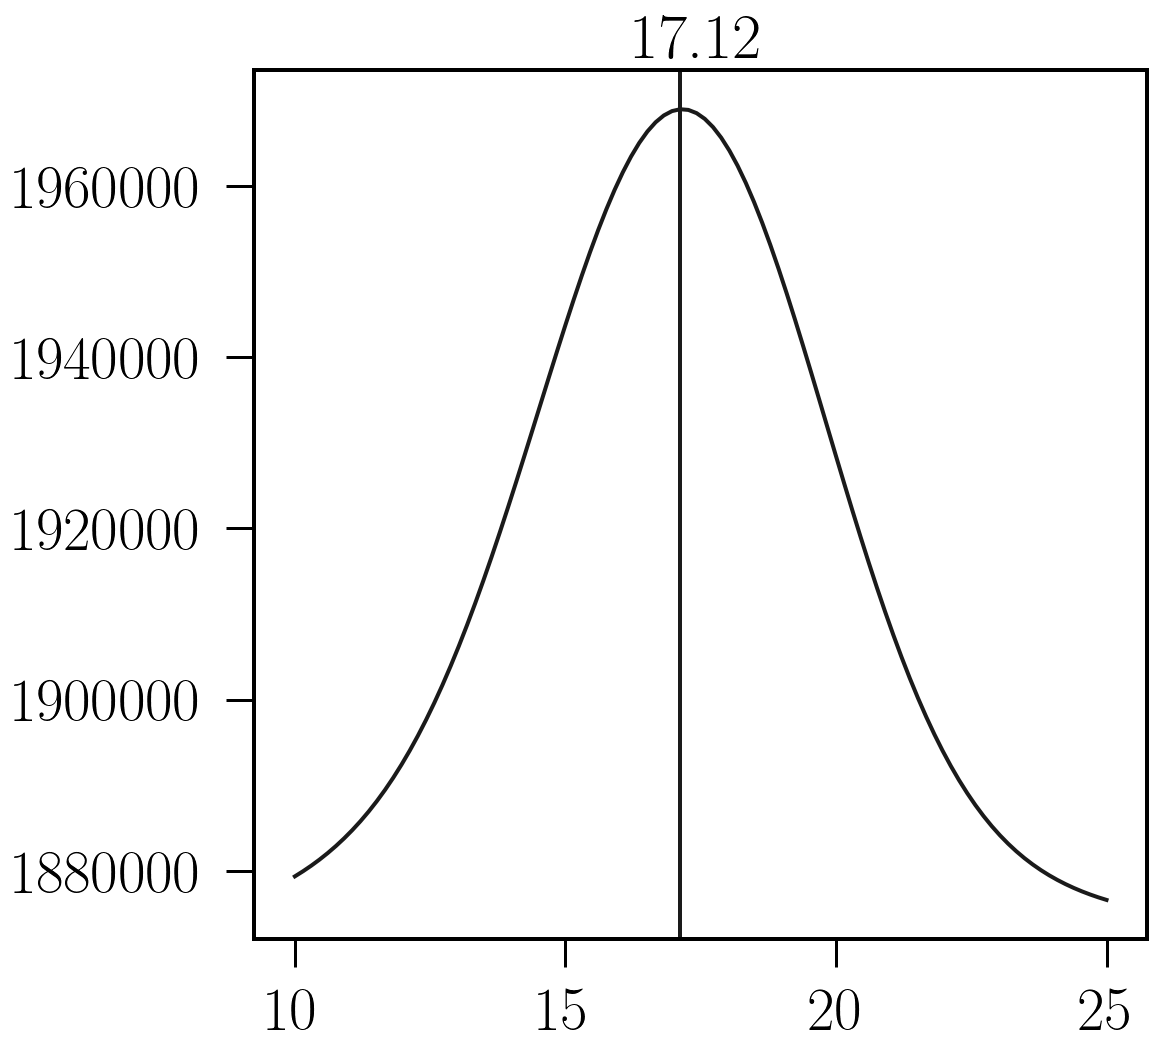

In [233]:
plt.plot(offsets, summed)
max_offset = offsets[np.argmax(summed)]
plt.title('%.2f' % max_offset, fontsize=32)
plt.gca().axvline(max_offset)

In [276]:

# Define model function to be used to fit to the data above:
def fixed_gauss(x, *p):
    global row_index
    A, sigma, C, B = p
    sigma = 2.0
    mu = model(row_index) + 17.12
    C = max(C,0)
    A = max(A,0)
#     print(row_index)
    return A*np.exp(-(x-mu)**2/(2.*sigma**2)) + C + x * B


sky_model = np.zeros( quasar_B.shape )
pixel = np.arange(0,len(row))
model_list = []
# loop through each row


for row_index in range(quasar_B.shape[0]):
    
    row = quasar_B[row_index,:]
    try:
        coeff, var_matrix = curve_fit(fixed_gauss, pixel, row, p0=[60., 2., 1525., 0.0])
        sky_model[row_index,:] = coeff[-2] + pixel * coeff[-1]
        model_list.append( fixed_gauss(pixel, *[1.0, 2., 0., 0.0]) )
        
    except Exception as e:
        # just use the mean value, probably a huge sky line or something
        sky_model[row_index,:] = np.median(row)
        model_list.append( np.ones(len(row)) )
        print(e)

profile_model = np.vstack(model_list)

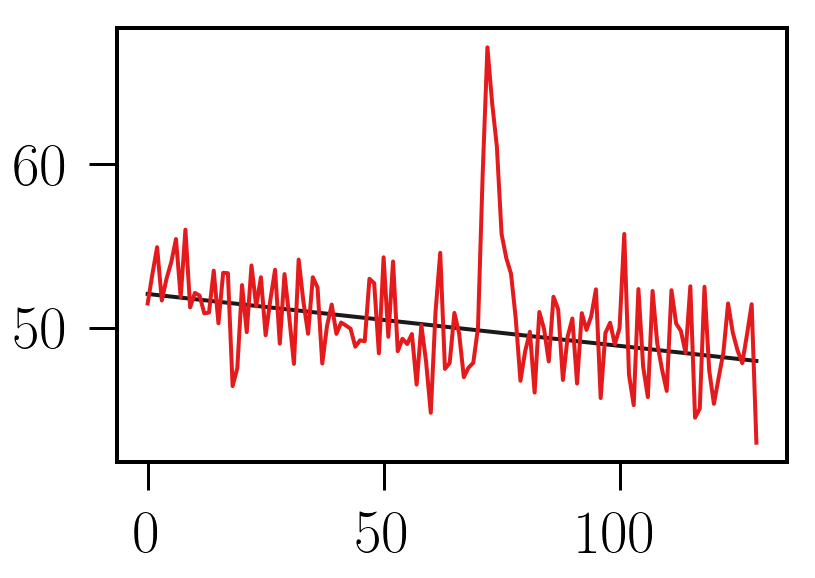

In [285]:
plt.plot(sky_model[1200,:])
plt.plot(quasar_B[1200,:])

INFO: Auto-setting vmin to  7.407e+00 [aplpy.core]
INFO: Auto-setting vmax to  9.643e+02 [aplpy.core]


INFO: Auto-setting vmin to  0.000e+00 [aplpy.core]
INFO: Auto-setting vmax to  9.967e-01 [aplpy.core]


INFO: Auto-setting vmin to -2.759e+01 [aplpy.core]
INFO: Auto-setting vmax to  3.209e+01 [aplpy.core]


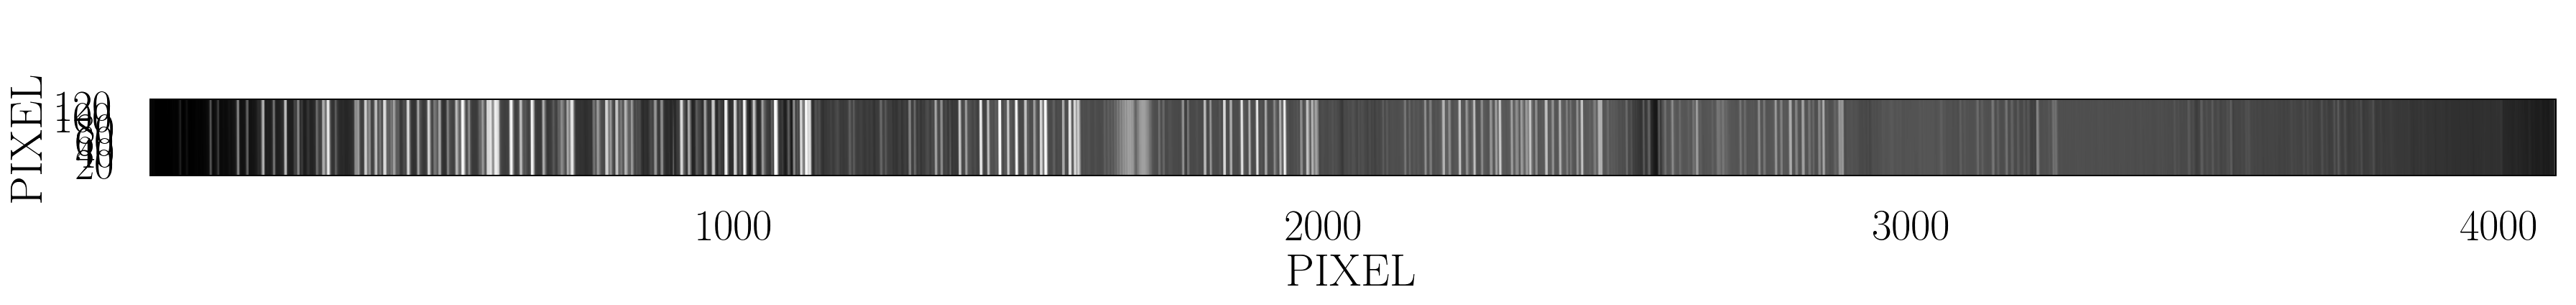

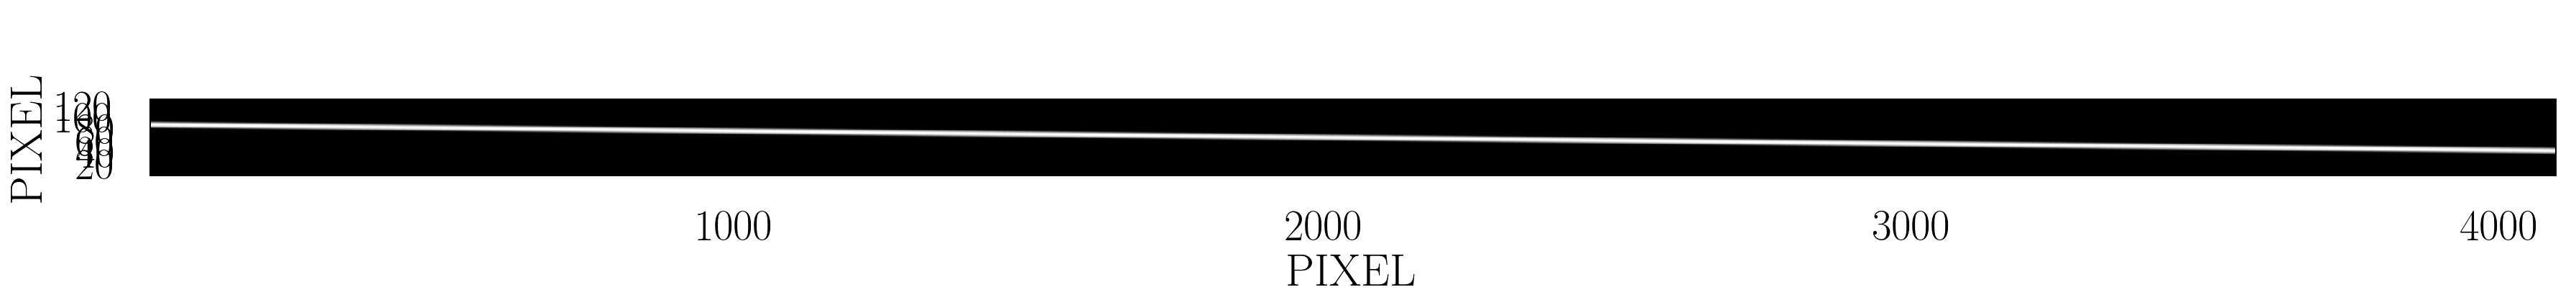

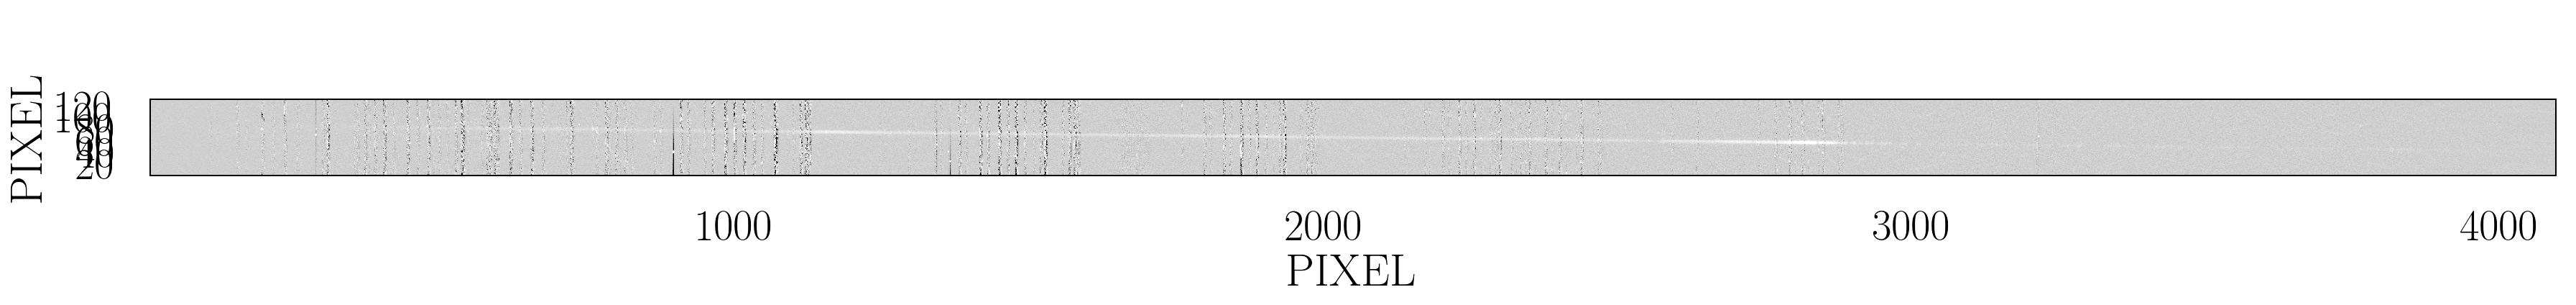

In [286]:
gc = aplpy.FITSFigure(sky_model.T, figsize=(30,3))
gc.show_grayscale(stretch='arcsinh')
gc = aplpy.FITSFigure((profile_model).T, figsize=(30,3))
gc.show_grayscale(stretch='arcsinh')
gc = aplpy.FITSFigure((quasar_B-sky_model).T, figsize=(30,3))
gc.show_grayscale(stretch='arcsinh')

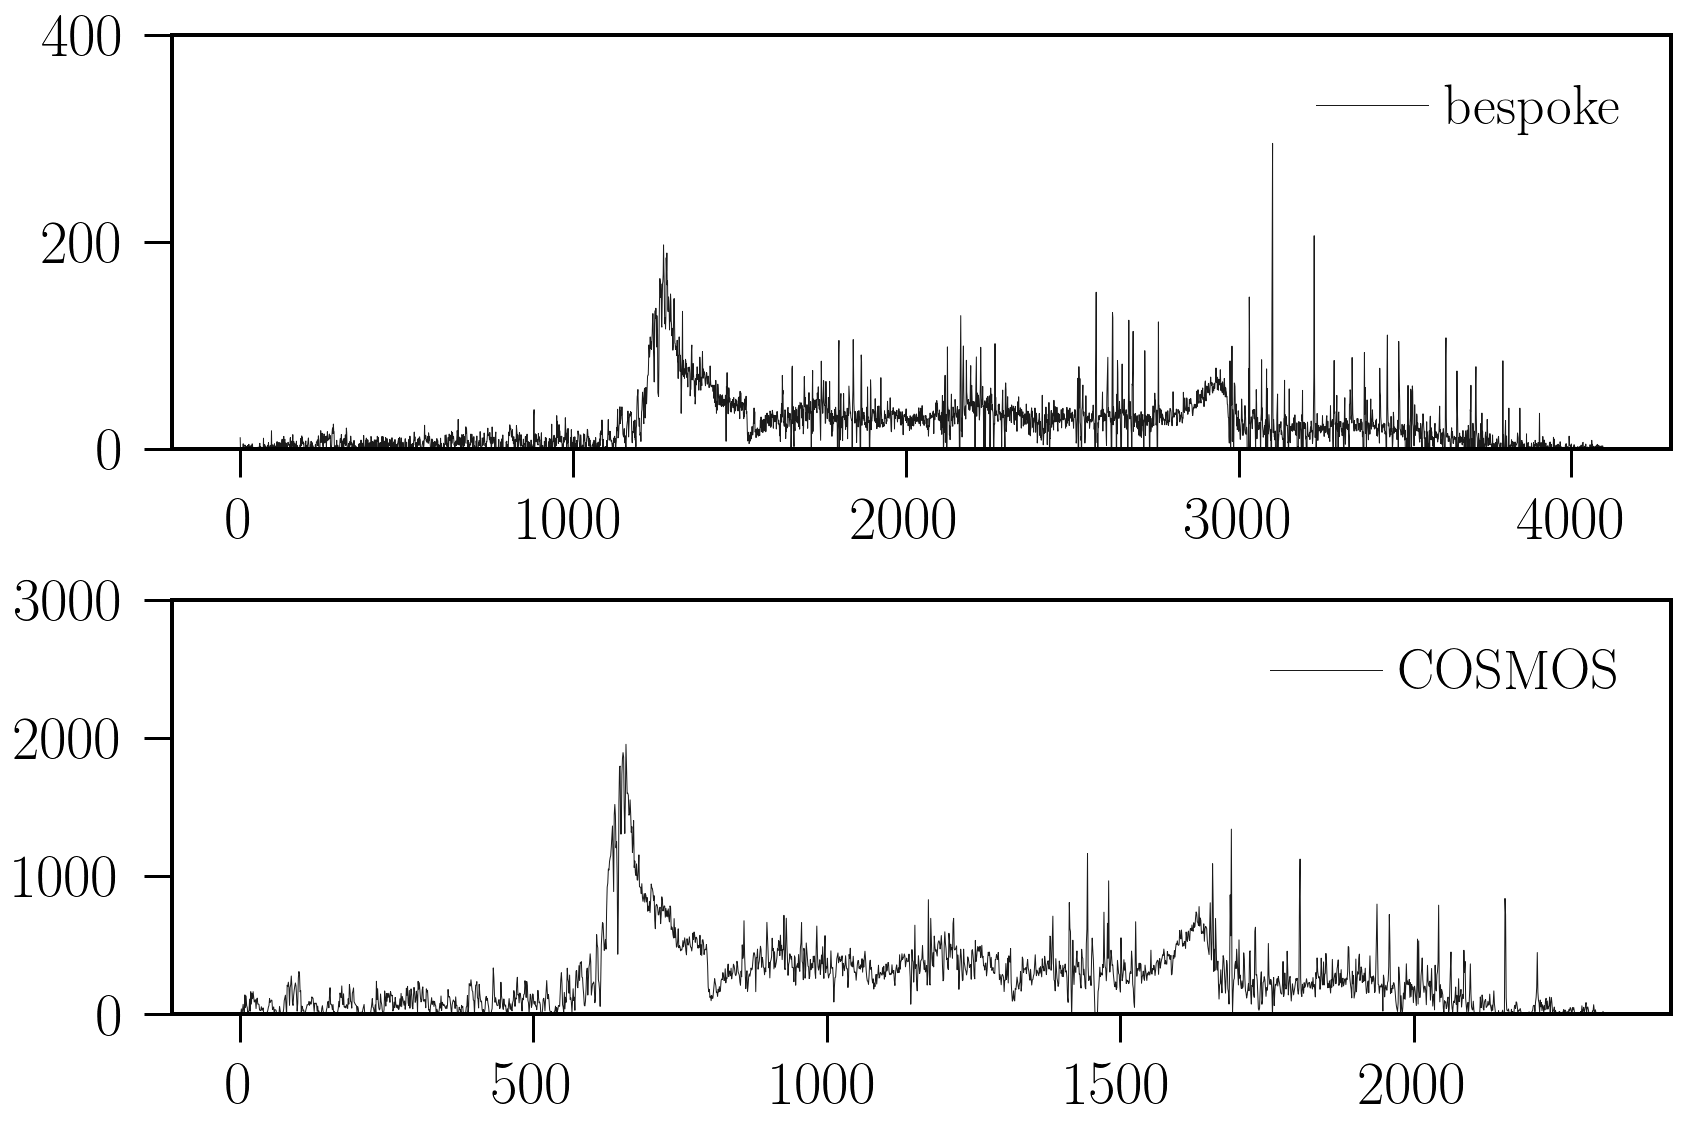

In [287]:
fig, ax = plt.subplots(2,1,figsize=(12,8))
ax[0].plot( np.arange(len(quasar_B))[::-1],
         np.sum( (quasar_B-sky_model)*profile_model, axis=1), '-', lw=0.5, label='bespoke' )
ax[1].plot(sig2,'-', lw=0.5, label='COSMOS')
ax[1].set_ylim(0,3000)
ax[0].set_ylim(0,400)

ax[0].legend()
ax[1].legend()
plt.tight_layout()